# Model Training

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('data/cleaned_data.csv')
df.head()

,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR),CustomerAge
0,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,25.0,22
1,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-02-08,27999.0,-41
2,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,459.0,20
3,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,2060.0,43
4,C9031234,1988-03-24,F,MUMBAI,6714.43,2016-02-08,1762.5,28


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041613 entries, 0 to 1041612
Data columns (total 8 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   CustomerID               1041613 non-null  object 
 1   CustomerDOB              1041613 non-null  object 
 2   CustGender               1041613 non-null  object 
 3   CustLocation             1041613 non-null  object 
 4   CustAccountBalance       1041613 non-null  float64
 5   TransactionDate          1041613 non-null  object 
 6   TransactionAmount (INR)  1041613 non-null  float64
 7   CustomerAge              1041613 non-null  int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 63.6+ MB


## Outlier Detection

In [3]:
from sklearn.ensemble import IsolationForest
num_cols = df.select_dtypes(include=[np.float64, np.int64])
isof = IsolationForest(n_estimators=100, contamination=0.1)
isof.fit(num_cols)
outliers = isof.predict(num_cols)
df['is_inliner'] = outliers
df = df[df['is_inliner'] == 1]
df.head()
df.drop('is_inliner', axis=1, inplace=True)


In [4]:
df

,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR),CustomerAge
0,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,25.0,22
2,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,459.0,20
4,C9031234,1988-03-24,F,MUMBAI,6714.43,2016-02-08,1762.5,28
5,C1536588,2072-08-10,F,ITANAGAR,53609.20,2016-02-08,676.0,-56
6,C7126560,1992-01-26,F,MUMBAI,973.46,2016-02-08,566.0,24
...,...,...,...,...,...,...,...,...
1041608,C8020229,1990-08-04,M,DELHI,7635.19,2016-09-18,799.0,26
1041609,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,460.0,24
1041610,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,770.0,27
1041611,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,1000.0,38


## Label Encoding

In [5]:
df=df.sample(n=100000,random_state=42).reset_index(drop=True)
df.head()

,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR),CustomerAge
0,C2632492,1992-10-04,F,THANE,45744.99,2016-08-15,817.0,24
1,C8711182,1982-07-28,M,GURGAON,139714.31,2016-05-09,950.0,34
2,C2935234,1991-07-25,M,KANPUR,889.42,2016-04-09,50.0,25
3,C3326829,2070-10-02,M,KOLKATA,46.94,2016-07-08,1250.0,-54
4,C6229519,1996-08-18,M,MUMBAI,4629.90,2016-08-16,26.0,20


In [6]:
df.drop(columns=['TransactionDate', 'CustomerDOB'], inplace=True)

In [7]:
# from sklearn.preprocessing import OneHotEncoder
# nominal_columns = df.select_dtypes(include=['object']).columns
# ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
# a = ohe.fit_transform(df[nominal_columns])
# a = pd.DataFrame(a, columns=ohe.get_feature_names_out(nominal_columns))
# df = df.drop(nominal_columns, axis=1)
# df = pd.concat([df, a], axis=1)

In [8]:
df

,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),CustomerAge
0,C2632492,F,THANE,45744.99,817.0,24
1,C8711182,M,GURGAON,139714.31,950.0,34
2,C2935234,M,KANPUR,889.42,50.0,25
3,C3326829,M,KOLKATA,46.94,1250.0,-54
4,C6229519,M,MUMBAI,4629.90,26.0,20
...,...,...,...,...,...,...
99995,C7736275,F,NOIDA,48527.09,2000.0,26
99996,C5578334,M,ROURKELA,32524.24,126.0,26
99997,C8640136,M,GURGAON,10631.47,719.0,23
99998,C1310435,F,BANGALORE,18594.53,230.0,31


## ordinal encoding

In [9]:
c = df.select_dtypes(include=['object']).columns
df[c]

,CustomerID,CustGender,CustLocation
0,C2632492,F,THANE
1,C8711182,M,GURGAON
2,C2935234,M,KANPUR
3,C3326829,M,KOLKATA
4,C6229519,M,MUMBAI
...,...,...,...
99995,C7736275,F,NOIDA
99996,C5578334,M,ROURKELA
99997,C8640136,M,GURGAON
99998,C1310435,F,BANGALORE


In [10]:
from sklearn.preprocessing import OrdinalEncoder

# instantiate the ordinal encoder
encoder = OrdinalEncoder()
columns = df.select_dtypes(include=['object']).columns
# fit and transform the data
df[columns] = encoder.fit_transform(df[columns])
column_names = df.columns
df

,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),CustomerAge
0,20051.0,0.0,2409.0,45744.99,817.0,24
1,93554.0,1.0,902.0,139714.31,950.0,34
2,23823.0,1.0,1153.0,889.42,50.0,25
3,28400.0,1.0,1275.0,46.94,1250.0,-54
4,63757.0,1.0,1563.0,4629.90,26.0,20
...,...,...,...,...,...,...
99995,82214.0,0.0,1727.0,48527.09,2000.0,26
99996,55846.0,1.0,2059.0,32524.24,126.0,26
99997,93249.0,1.0,902.0,10631.47,719.0,23
99998,3712.0,0.0,220.0,18594.53,230.0,31


In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = scaler.fit_transform(df)
# pca = PCA(n_components=0.80)
# df = pca.fit_transform(df)
df = pd.DataFrame(df)
df.columns = column_names
df

,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),CustomerAge
0,-1.024749,-1.625155,1.877483,-0.027045,-0.033353,-0.085795
1,1.564224,0.615326,-0.299780,0.941169,0.069187,0.282631
2,-0.891889,0.615326,0.062856,-0.489215,-0.624696,-0.048953
3,-0.730675,0.615326,0.239118,-0.497896,0.300481,-2.959521
4,0.514694,0.615326,0.655210,-0.450675,-0.643199,-0.233166
...,...,...,...,...,...,...
99995,1.164799,-1.625155,0.892152,0.001620,0.878717,-0.012110
99996,0.236047,0.615326,1.371814,-0.163265,-0.566101,-0.012110
99997,1.553482,0.615326,-0.299780,-0.388838,-0.108910,-0.122638
99998,-1.600252,-1.625155,-1.285111,-0.306790,-0.485919,0.172103


In [12]:
# from sklearn.cluster import KMeans, MiniBatchKMeans
# from sklearn.metrics import silhouette_score
#
# inertia = []
# sil_score = []
#
# for k in range(3, 15):
#     kmeans = MiniBatchKMeans(n_clusters=k, init="k-means++")
#     kmeans.fit(df)
#     inertia.append(kmeans.inertia_)
#     sil = silhouette_score(df, kmeans.labels_)
#     sil_score.append(sil)
#
# plt.grid()
# plt.plot(range(3, 15), inertia)
# plt.xlabel('Number of clusters')
# plt.ylabel('Inertia')
# plt.show()

In [13]:
# plt.plot(range(3, 15), sil_score)
# plt.xlabel('Number of clusters')
# plt.ylabel('score')
# plt.show()

In [14]:
# pca = PCA(2)
# df1 = pca.fit_transform(df)
# df1 = pd.DataFrame(df1)
# df1.columns = ['PC1', 'PC2']
# df1

## customer location

In [15]:
df1 = df[['CustLocation', 'TransactionAmount (INR)']]
df1

,CustLocation,TransactionAmount (INR)
0,1.877483,-0.033353
1,-0.299780,0.069187
2,0.062856,-0.624696
3,0.239118,0.300481
4,0.655210,-0.643199
...,...,...
99995,0.892152,0.878717
99996,1.371814,-0.566101
99997,-0.299780,-0.108910
99998,-1.285111,-0.485919


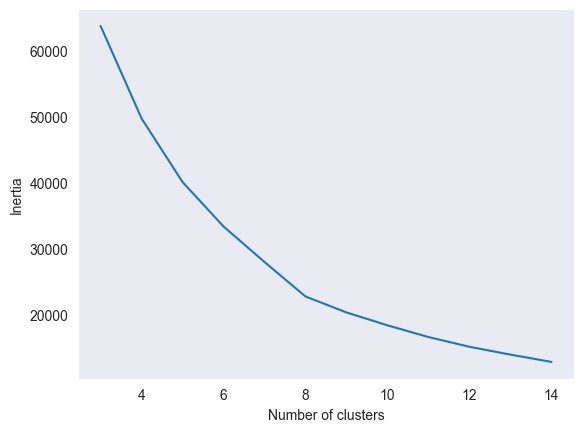

In [16]:
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_score

inertia = []
sil_score = []

for k in range(3, 15):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df1)
    inertia.append(kmeans.inertia_)
    # sil = silhouette_score(df, kmeans.labels_)
    # sil_score.append(sil)

plt.grid()
plt.plot(range(3, 15), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()
# plt.plot(range(3, 15), sil_score)
# plt.xlabel('Number of clusters')
# plt.ylabel('score')
# plt.show()

In [17]:
inertia

[63792.269285050694,
 49763.98667104394,
 40116.69932651943,
 33382.06120361219,
 27991.10897016841,
 22767.76654736312,
 20348.60265861244,
 18393.674877987636,
 16618.82966944302,
 15139.975472285665,
 13954.960175771586,
 12847.950971829407]

In [18]:
# pca.components_

In [19]:
kmeans = KMeans(n_clusters=7, init="k-means++")
labels = kmeans.fit_predict(df1)
df1['labels'] = labels
df1

,CustLocation,TransactionAmount (INR),labels
0,1.877483,-0.033353,5
1,-0.299780,0.069187,6
2,0.062856,-0.624696,6
3,0.239118,0.300481,6
4,0.655210,-0.643199,0
...,...,...,...
99995,0.892152,0.878717,2
99996,1.371814,-0.566101,5
99997,-0.299780,-0.108910,6
99998,-1.285111,-0.485919,1


In [20]:
df1.columns = ['PC1', 'PC2', 'labels']

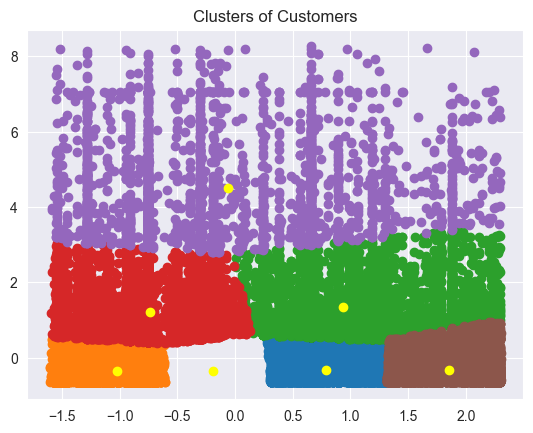

In [22]:
plt.scatter(df1[ df1['labels'] == 0]['PC1'], df1[ df1['labels'] == 0]['PC2'])
plt.scatter(df1[ df1['labels'] == 1]['PC1'], df1[ df1['labels'] == 1]['PC2'])
plt.scatter(df1[ df1['labels'] == 2]['PC1'], df1[ df1['labels'] == 2]['PC2'])
plt.scatter(df1[ df1['labels'] == 3]['PC1'], df1[ df1['labels'] == 3]['PC2'])
plt.scatter(df1[ df1['labels'] == 4]['PC1'], df1[ df1['labels'] == 4]['PC2'])
plt.scatter(df1[ df1['labels'] == 5]['PC1'], df1[ df1['labels'] == 5]['PC2'])

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='yellow', label = 'Centroids')
plt.title('Clusters of Customers')

plt.show()